## Observations and Insights 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on=("Mouse ID"), how= "outer")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [106]:
#mouse_metadata.head()

In [107]:
#study_results.head()

In [108]:
# Checking the number of mice with duplicates
num_mice=merged_df["Mouse ID"].value_counts().count()
num_mice


249

In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice=merged_df.drop_duplicates(subset= ("Mouse ID","Timepoint"))
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Optional: Get all the data for the duplicate mouse ID. 



In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
num_clean_mice=clean_mice["Mouse ID"].value_counts().count()

# Checking the number of mice in the clean DataFrame.
num_clean_mice

249

## Summary Statistics

In [113]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#pull columns i need
drug_reg_df=clean_mice.loc[:, ["Tumor Volume (mm3)","Drug Regimen"]]
drug_index=drug_reg_df.set_index("Drug Regimen")
drug_index



,Tumor Volume (mm3)
Drug Regimen,
Ramicane,45.000000
Ramicane,38.825898
Ramicane,35.014271
Ramicane,34.223992
Ramicane,32.997729
...,...
Naftisol,63.145652
Naftisol,65.841013
Naftisol,69.176246


In [114]:
# groupby drug regimen

group_drug=drug_index.groupby(["Drug Regimen"])
group_drug

In [115]:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug=group_drug["Tumor Volume (mm3)"].mean()
#print(mean_drug)


median_drug=group_drug["Tumor Volume (mm3)"].median()
#print(median_drug)

var_drug=group_drug["Tumor Volume (mm3)"].var()
#print(var_drug)

std_drug=group_drug["Tumor Volume (mm3)"].std()
#print(std_drug)

sem_drug=group_drug["Tumor Volume (mm3)"].sem()
#print(sem_drug)



In [116]:
# Assemble the resulting series into a single summary dataframe.

sum_drug=pd.DataFrame({
        "Mean": mean_drug,
        "Median": median_drug,
        "Varience": var_drug,
        "Standard Deviation": std_drug,
        "SEM": sem_drug
})
sum_drug



,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:

# Using the aggregation method, produce the same summary statistics in a single line-HELP HERE confirm answer?
agg_group_drug= group_drug.agg(["mean","median","std"])
agg_group_drug

Tumor Volume (mm3)                     
                           mean     median       std
Drug Regimen                                        
Capomulin             40.675741  41.557809  4.994774
Ceftamin              52.591172  51.776157  6.268188
Infubinol             52.884795  51.820584  6.567243
Ketapril              55.235638  53.698743  8.279709
Naftisol              54.331565  52.509285  8.134708
Placebo               54.033581  52.288934  7.821003
Propriva              52.393463  50.909965  6.568014
Ramicane              40.216745  40.673236  4.846308
Stelasyn              54.233149  52.431737  7.710419
Zoniferol             53.236507  51.818479  6.966589

## Bar and Pie Charts

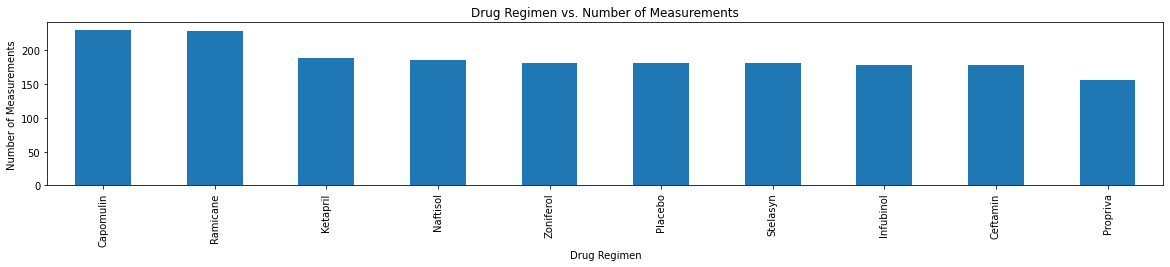

In [184]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#count of how many time it was ran per drug
measurement_drug=clean_mice["Drug Regimen"].value_counts()
measurement_drug_df=pd.DataFrame(measurement_drug)

measurement_pandas=measurement_drug_df["Drug Regimen"]
measurement_pandas

plt.title("Drug Regimen vs. Number of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

measurement_pandas.plot(kind="bar", figsize=(20,3))
plt.show()


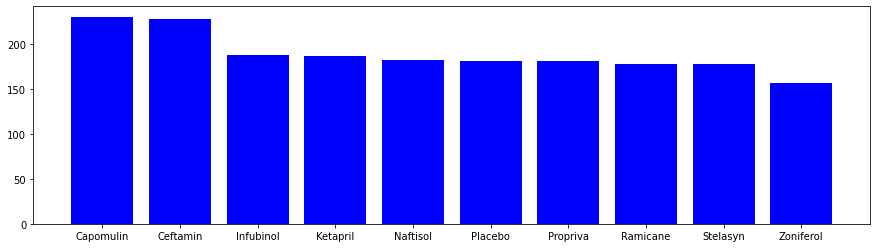

In [210]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#need y-axis will be the count of how many times they meausured each drug

x_axis=list(sum_drug.index)
x_axis

#need y-axis will be the count of how many times they meausured each drug
y_axis=measurement_drug_df["Drug Regimen"].array
y_axis

plt.figure(figsize=(15,4))
plt.bar(x_axis,y_axis, color='b',)
plt.show()


In [316]:
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [317]:
# Generate a pie plot showing the distribution of female versus male mice using pandas  
#helpful resource: https://www.youtube.com/watch?v=0P7QnIQDBJY


gender_mice=merged_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
gender_mice

Male      125
Female    124
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Mice Gender'}, ylabel='Sex'>

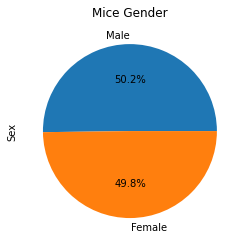

In [337]:
#Setup DF for pandas

gender_mice.plot.pie(y='Gender',autopct="%1.1f%%",title = "Mice Gender")

(-1.1000791940320744,
 1.1016630746735625,
 -1.1017685314144796,
 1.1009347297692742)

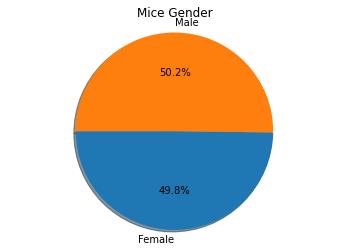

In [366]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
count=[124,125]

plt.title("Mice Gender")

plt.pie(count,labels=labels,autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [330]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_df = clean_mice.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
max_tumor_df.head(3)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_mice,on=['Mouse ID','Timepoint'],how="left")
merged_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [331]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print()

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



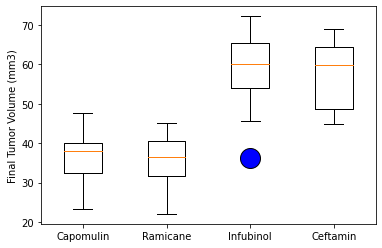

In [334]:
outliers = dict(markerfacecolor='blue',markersize=20)
plt.boxplot(tumor_vol_list,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [ ]:
capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()

corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]